In [4]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib
!pip install seaborn

import mysql.connector
import pandas as pd



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\paula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import mysql.connector
import pandas as pd

# Connexió a MySQL (Sense contrasenya, perquè el meu servidor no en té)
with mysql.connector.connect(
    host='localhost', user='root', database='sprint_4'
) as db_connection:
    with db_connection.cursor() as cursor:
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]

    # Carregar les taules en DataFrames
    DataFrames = {}
    with db_connection.cursor(dictionary=True) as cursor:
        for table in MySQL_tables:
            cursor.execute(f"SELECT * FROM {table}")
            DataFrames[f"df_{table}"] = pd.DataFrame(cursor.fetchall())

df_transactions = DataFrames.get("df_transactions")
df_companies = DataFrames.get("df_companies")
df_credit_cards = DataFrames.get("df_credit_cards")
df_estat_targetes = DataFrames.get("df_estat_targetes")
df_users = DataFrames.get("df_users")


- Exercici 1
Una variable numèrica.

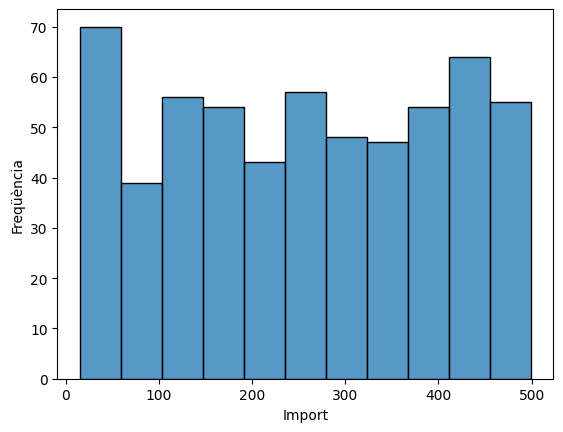

In [6]:
# Variable: quantitat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de "amount" a la taula de 'transactions'
sns.histplot(df_transactions['amount'])
plt.xlabel('Import')
plt.ylabel('Freqüència')
plt.show()



- Exercici 2
Dues variables numèriques.

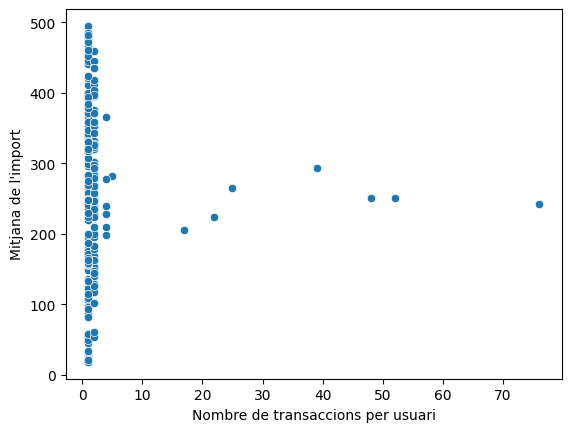

In [7]:
#Variables: nombre de transaccions, import mitjà

df_users_2 = df_transactions.groupby("user_id")["amount"].agg(["count", "mean"])

# Diagrama de dispersió de nombre transaccions i import mitjà
sns.scatterplot(x=df_users_2["count"], y=df_users_2["mean"])
plt.xlabel("Nombre de transaccions per usuari")
plt.ylabel("Mitjana de l'import")
plt.show()


- Exercici 3
Una variable categòrica.

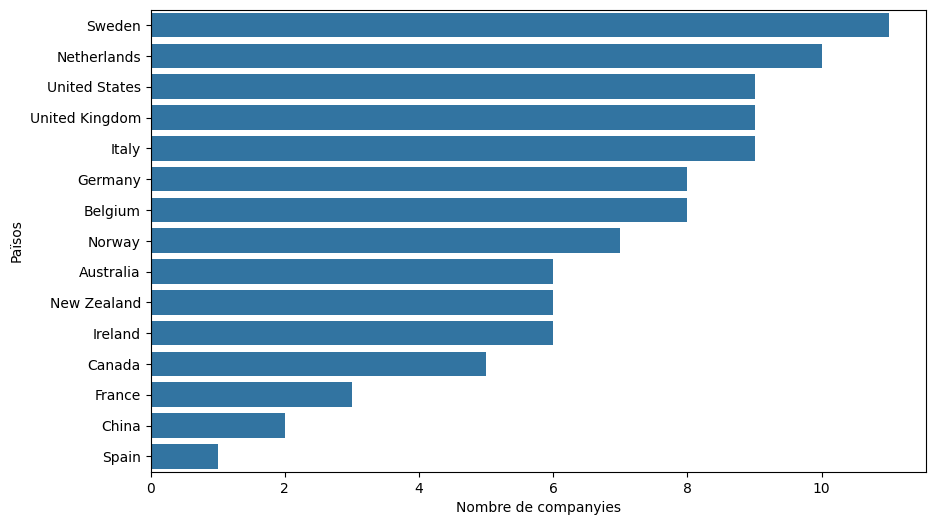

In [14]:
#Variable: països

import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de barres

plt.figure(figsize=(10, 6))
country_counts = df_companies["country"].value_counts()

sns.barplot(y=country_counts.index, x=country_counts.values)

plt.xlabel("Nombre de companyies")
plt.ylabel("Països")
plt.show()



- Exercici 4
Una variable categòrica i una numèrica.

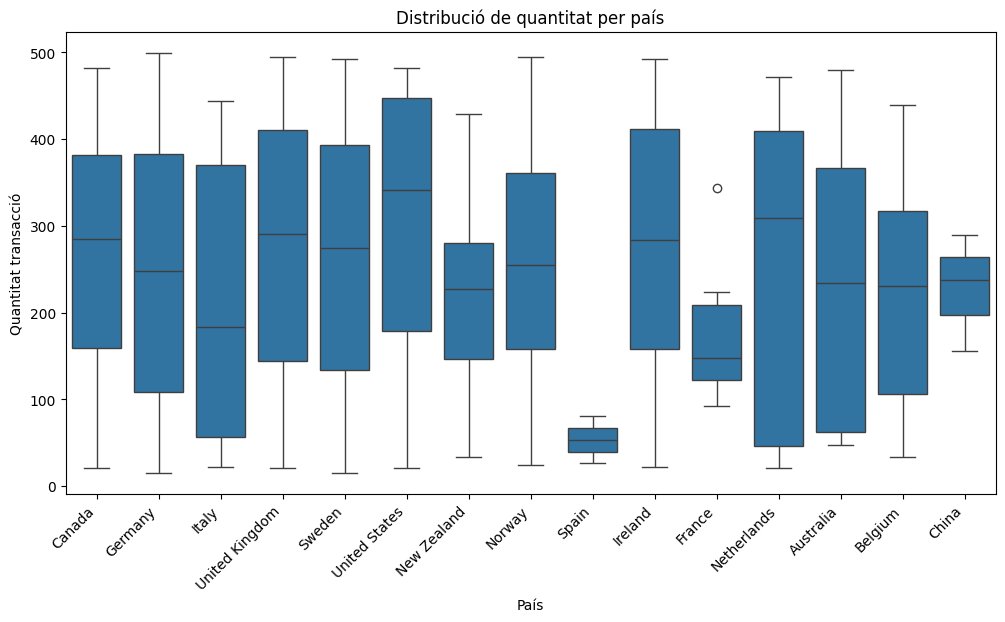

In [15]:
# Variables: quantitat, països

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupació de df_transactions i df_companies
df_tr_comp = pd.merge(df_transactions, df_companies[['company_id', 'country']], on='company_id', how='left')

# Boxplot de 'amount' per 'country'
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='amount', data=df_tr_comp)

# Configuració dels títols
plt.title('Distribució de quantitat per país')
plt.xlabel('País')
plt.ylabel('Quantitat transacció')

# Rotació de les etiquetes de l'eix X
plt.xticks(rotation=45, ha="right")


plt.show()



- Exercici 5
Dues variables categòriques.

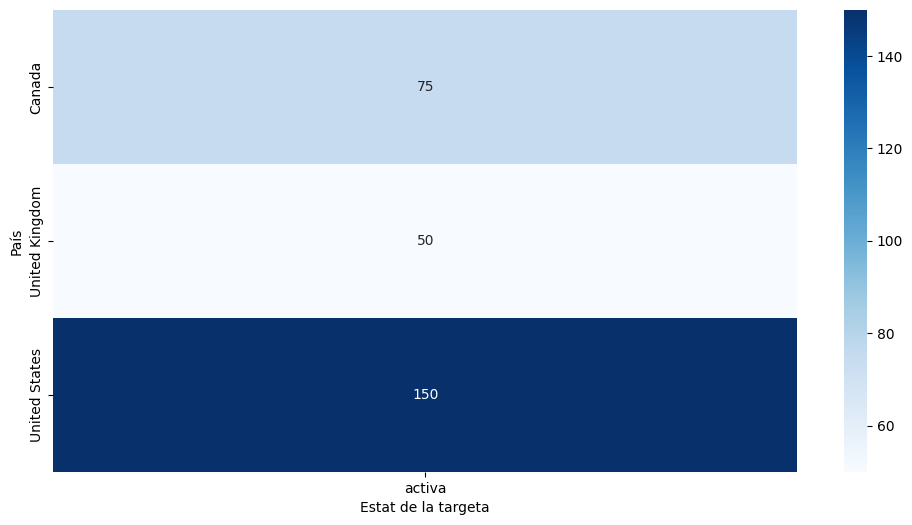

In [11]:
# Variables: País dels usuaris, estat de la targeta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupació dels df de users i estat_targetes
df_users_cards = df_users.merge(df_credit_cards, on='user_id', how='left')
df_users_cards = df_users_cards.merge(df_estat_targetes, on='card_id', how='left')

# Taula de freqüències
heatmap_data = pd.crosstab(df_users_cards['country'], df_users_cards['estat'])

# Creació mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Estat de la targeta")
plt.ylabel("País")
plt.show()



- Exercici 6
Tres variables.

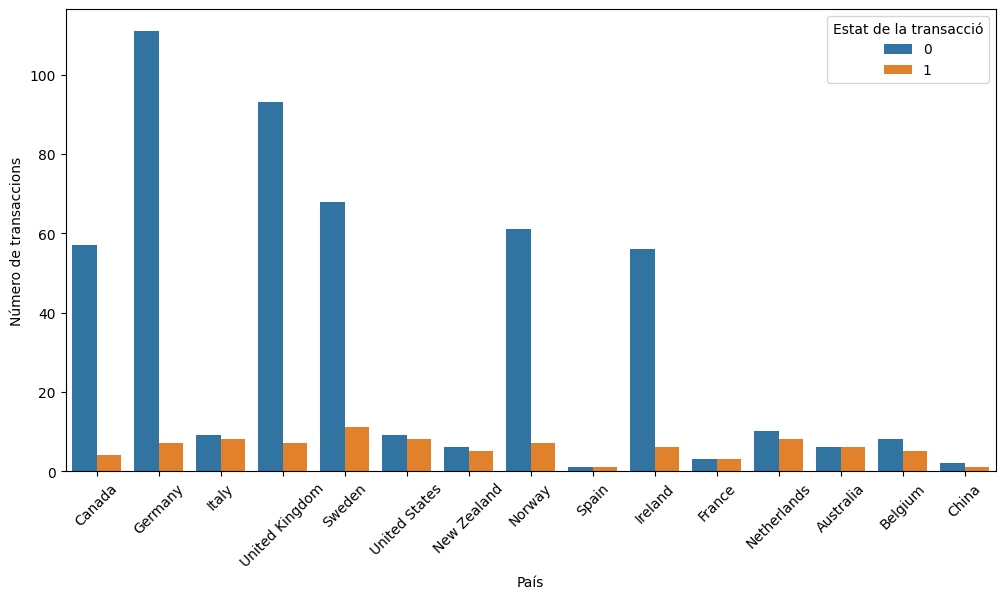

In [12]:
# Variables: Número de transaccions, estat de la transacció, països

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupació de df_transactions i df_companies
df_tr_comp = pd.merge(df_transactions, df_companies[['company_id', 'country']], on='company_id', how='left')

plt.figure(figsize=(12, 6))
sns.countplot(x=df_tr_comp['country'], hue=df_tr_comp['declined'])

# Gràfic de barres de l'estat de la transacció per països
plt.xlabel("País")
plt.ylabel("Número de transaccions")
plt.xticks(rotation=45)
plt.legend(title="Estat de la transacció")
plt.show()




- Exercici 7
Graficar un Pairplot.

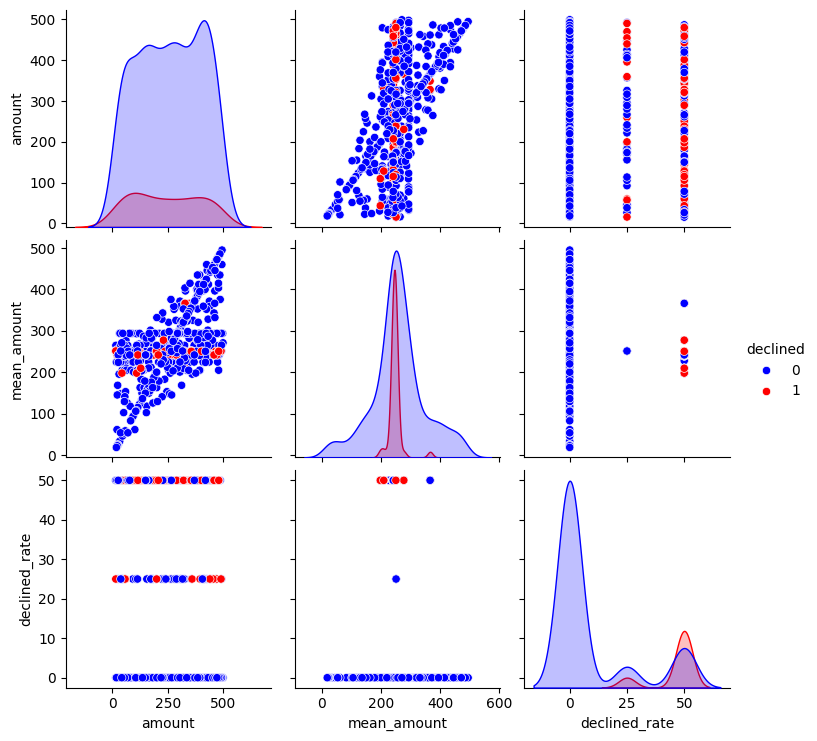

In [19]:
# Variables: Mitjana de transaccions per usuari, percentatge de transaccions declinades per usuari, quantitat

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupació de transactions i users
df_tr_users = df_transactions.merge(df_users, on='user_id', how='left')

# Mitjana de transaccions per usuari
mean_amount_per_user = df_tr_users.groupby('user_id')['amount'].mean().reset_index()
mean_amount_per_user.columns = ['user_id', 'mean_amount']

# Percentatge de transaccions declinades per usuari
declined_rate = df_tr_users.groupby('user_id')['declined'].mean().reset_index()
declined_rate['declined'] = declined_rate['declined'] * 100  # Per convertir a percentatge
declined_rate.columns = ['user_id', 'declined_rate']

# S'agefeixen aquestes variables noves al dataframe principal
df_tr_users = df_tr_users.merge(mean_amount_per_user, on='user_id', how='left')
df_tr_users = df_tr_users.merge(declined_rate, on='user_id', how='left')

# Gràfic pairplot
numeric_vars = ['amount', 'mean_amount', 'declined_rate']
sns.pairplot(df_tr_users, vars=numeric_vars, hue='declined', palette={0: 'blue', 1: 'red'})

plt.show()
